## EDA & Feature Engineering

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 



In [2]:
data=pd.read_csv('train.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
data.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [5]:
df1=pd.DataFrame(data['Product_Category_2'].value_counts())
data['Product_Category_2'].fillna(df1.index[0],inplace=True)
df2=df1=pd.DataFrame(data['Product_Category_3'].value_counts())
data['Product_Category_3'].fillna(df1.index[0],inplace=True)

In [6]:
df1=data.loc[:,['Age','Gender','User_ID']]
df1=df1.drop_duplicates()
df1=df1.groupby(['Age','Gender']).count()
df2=df1.pivot_table(values='User_ID',columns='Age',index='Gender')
df2

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
Gender,,,,,,,
F,78,287,545,333,182,142,99
M,140,782,1508,834,349,339,273


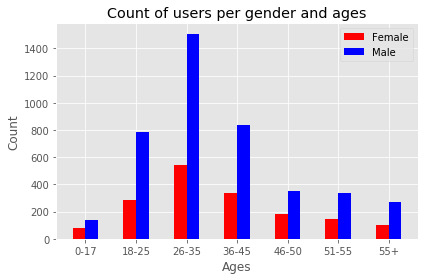

In [7]:
#Data_Manipulation
df1=data.loc[:,['Age','Gender','User_ID']]
df1=df1.drop_duplicates()
df1=df1.groupby(['Age','Gender']).count()
df2=df1.pivot_table(values='User_ID',columns='Age',index='Gender')
#Data_Visualization
plt.style.use('ggplot')
ages_x=np.sort(data['Age'].unique())
x_index=np.arange(len(ages_x))
delta=0.25
plt.bar(x_index-(delta/2),df2.loc['F',:],width=delta,color='r',label='Female')
plt.bar(x_index+(delta/2),df2.loc['M',:],width=delta,color='b',label='Male')
plt.legend()
plt.xticks(ticks=x_index,labels=ages_x)
plt.title('Count of users per gender and ages')
plt.xlabel('Ages')
plt.ylabel('Count')
plt.tight_layout()

In [8]:
df=data.loc[:,['User_ID','Product_ID']]
df.drop_duplicates()
df=df.groupby('User_ID').count()
df.columns=['Stats']
print(df.describe())

             Stats
count  5891.000000
mean     93.374300
std     107.190049
min       6.000000
25%      26.000000
50%      54.000000
75%     117.000000
max    1026.000000


In [9]:
df=data.loc[:,['User_ID','Product_ID','Gender']]
df_F=df[df['Gender']=='F']
df_F.drop_duplicates()
df_F=df_F.groupby('User_ID').count()
print("For women ")
print(df_F.loc[:,['Product_ID']].describe())
df_M=df[df['Gender']=='M']
df_M.drop_duplicates()
df_M=df_M.groupby('User_ID').count()
print("\n For men ")
print(df_M.loc[:,['Product_ID']].describe())

For women 
        Product_ID
count  1666.000000
mean     81.518007
std      95.755331
min       7.000000
25%      23.000000
50%      45.000000
75%      99.750000
max     752.000000

 For men 
        Product_ID
count  4225.000000
mean     98.049467
std     111.039881
min       6.000000
25%      27.000000
50%      58.000000
75%     123.000000
max    1026.000000


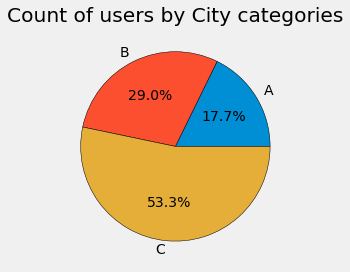

In [10]:
plt.style.use('fivethirtyeight')
df=data.loc[:,['User_ID','City_Category']]
df=df.drop_duplicates()
df=df.groupby('City_Category').count()
Count_Users=df['User_ID']
City_Category=df.index
plt.pie(Count_Users,labels=City_Category,wedgeprops={'edgecolor':'black'},autopct='%1.1f%%')
plt.title('Count of users by City categories')
plt.tight_layout()

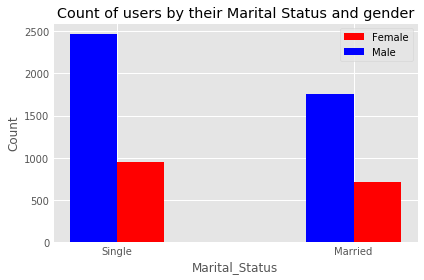

In [11]:
plt.style.use('ggplot')
#Data_Manipulation 
df=data.loc[:,['User_ID','Gender','Marital_Status']]
df=df.drop_duplicates()
df=df.groupby(['Gender','Marital_Status']).count()
df=df.pivot_table(values='User_ID',index='Gender',columns='Marital_Status')
#Data_Visualization
x_indexes=np.array([0.5,0.75])
width=0.05
plt.bar(x_indexes+(width/2),df.loc['F',:],width=width,color='r',label='Female')
plt.bar(x_indexes-(width/2),df.loc['M',:],width=width,color='b',label='Male')
plt.legend()
plt.xticks(ticks=x_indexes,labels=['Single','Married'])
plt.title('Count of users by their Marital Status and gender')
plt.xlabel('Marital_Status')
plt.ylabel('Count')
plt.tight_layout()

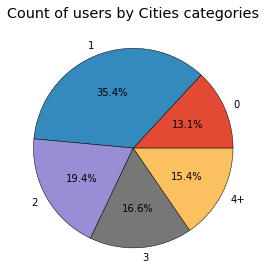

In [12]:
plt.style.use('ggplot')
df=data.loc[:,['User_ID','Stay_In_Current_City_Years']]
df=df.drop_duplicates()
df=df.groupby('Stay_In_Current_City_Years').count()
Count_Users=df['User_ID']
Duration_Residency=df.index
plt.pie(Count_Users,labels=Duration_Residency,wedgeprops={'edgecolor':'black'},autopct='%1.1f%%')
plt.title('Count of users by Cities categories')
plt.tight_layout()

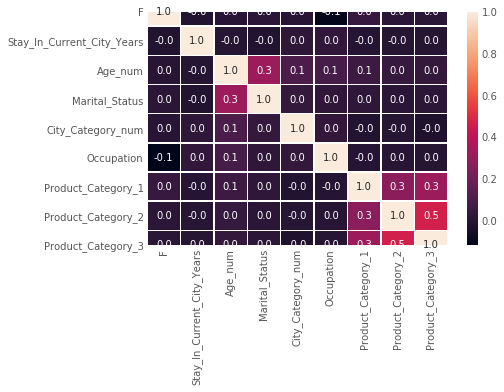

In [13]:
#In this part i tried to give the category_city and Age variables a numerical values so i can be able to calculate the correlation with the "purchase" variable
data['City_Category_num']=data['City_Category'].map({'A':1,'B':2,'C':3})
data['Age_num']=data['Age'].map({'0-17':8.5,'18-25':21.5,'26-35':30.5,'36-45':40.5,'46-50':48,'51-55':53,'55+':55})


City_Category=pd.get_dummies(data['City_Category'])
Gender=pd.DataFrame(pd.get_dummies(data['Gender']))
Gender=Gender.iloc[:,0]
Duration_Residency=pd.to_numeric(data['Stay_In_Current_City_Years'].str[0])
Data_Train=pd.concat([Gender,Duration_Residency,data.loc[:,['Age_num','Marital_Status','City_Category_num','Occupation','Product_Category_1','Product_Category_2','Product_Category_3']]],axis=1)
X=np.array(Data_Train)
y=np.array(data['Purchase'])
sns.heatmap(Data_Train.corr(), annot=True, linewidths=.5, fmt= '.1f')

Text(0, 0.5, 'Count')

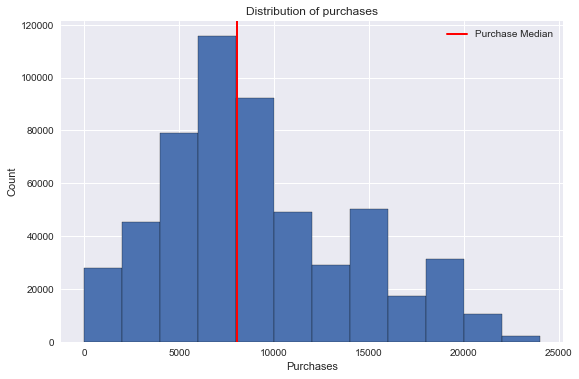

In [14]:
plt.style.use('seaborn')
Purchase=data['Purchase']
bins=[0,2000,4000,6000,8000,10000,12000,14000,16000,18000,20000,22000,24000]
Median_Purchase=np.median(Purchase)
plt.hist(data['Purchase'],bins=bins,edgecolor='black')
plt.axvline(Median_Purchase,color='red',label='Purchase Median',linewidth=2)
plt.legend()
plt.title('Distribution of purchases')
plt.xlabel('Purchases')
plt.ylabel('Count')

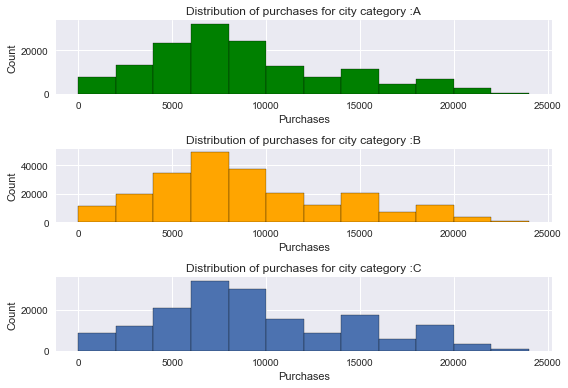

In [15]:
df_A=data[data['City_Category']=='A'].loc[:,'Purchase']
df_B=data[data['City_Category']=='B'].loc[:,'Purchase']
df_C=data[data['City_Category']=='C'].loc[:,'Purchase']
fig,(ax1,ax2,ax3)=plt.subplots(nrows=3,ncols=1)
ax1.hist(df_A,bins=bins,edgecolor='black',color='green')
ax2.hist(df_B,bins=bins,edgecolor='black',color='orange')
ax3.hist(df_C,bins=bins,edgecolor='black')

ax1.set_title('Distribution of purchases for city category :A')
ax1.set_xlabel('Purchases')
ax1.set_ylabel('Count')


ax2.set_title('Distribution of purchases for city category :B')
ax2.set_xlabel('Purchases')
ax2.set_ylabel('Count')

ax3.set_title('Distribution of purchases for city category :C')
ax3.set_xlabel('Purchases')
ax3.set_ylabel('Count')

plt.tight_layout()

## Building machine learning model

### Gradient Boosting Tree Regressor

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

## Tuning the n_estimators for a fixed learning_rate and tree_specific parameters

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
parameters={'n_estimators':range(40,91,10)}
REG=GradientBoostingRegressor(learning_rate=0.1,min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8)
regression=GridSearchCV(REG,parameters,cv=5,scoring='r2')
regression.fit(X_train,y_train)
print(regression.best_params_)
print(regression.best_score_)

{'n_estimators': 90}
0.6599456918696806


## Tuning the tree_specific parameters

In [17]:
parameters={'max_depth':range(3,9,1),'min_samples_split':range(2000,3000,500)}
REG=GradientBoostingRegressor(learning_rate=0.1,n_estimators=90,min_samples_leaf=50,max_features='sqrt',subsample=0.8)
regression=GridSearchCV(REG,parameters,cv=5,scoring='r2')
regression.fit(X_train,y_train)
print(regression.best_params_)
print(regression.best_score_)

{'max_depth': 8, 'min_samples_split': 2000}
0.6570144824304839


In [30]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
model_1=GradientBoostingRegressor(learning_rate=0.1,n_estimators=90,max_depth=8,min_samples_split=2000,min_samples_leaf=50,max_features='sqrt',subsample=0.8)
model_1.fit(X_train,y_train)
y_predict_train=model_1.predict(X_train)
y_predict_test=model_1.predict(X_test)
print(r2_score(y_train,y_predict_train))
print(r2_score(y_test,y_predict_test))

0.6604287434409917
0.6575529701689915


## Random Forest Regressor

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
params={'max_depth':range(3,9,1) ,'min_samples_split':[2000,2500],'n_estimators':range(40,81,10)}
REG_FO=GridSearchCV(RandomForestRegressor(),params,cv=5,scoring='r2')
REG_FO.fit(X_train,y_train)
print(REG_FO.best_params_)
print(REG_FO.best_score_)

{'max_depth': 8, 'min_samples_split': 2000, 'n_estimators': 80}
0.6491529302812172


In [36]:
model_2=GradientBoostingRegressor(n_estimators=80,max_depth=8,min_samples_split=2000)
model_2.fit(X_train,y_train)
y_predict_train=model_2.predict(X_train)
y_predict_test=model_2.predict(X_test)
print(r2_score(y_train,y_predict_train))
print(r2_score(y_test,y_predict_test))

0.6669836594690692
0.6639472009649192
